<a href="https://colab.research.google.com/github/nafri97/Rakamin-Data-Science-33-Homework/blob/main/Salinan_Homework_Template_Rakamin_Trial_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Homework Rakamin Trial Class - Mini Case

# Mengukur Performa Penjualan Ritel Online

## Import Libraries

In [4]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


## Load Data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/gdrive/MyDrive/Salinan online_retail_II.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [10]:
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009


## Section 1

### Create New Feature: Year

Pertama kita rubah tipe data pada `InvoiceData` dari `object` menjadi `datetime`, baru kita membuat kolom baru `year`.

In [9]:
# rubah dtype object menjadi datetime
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
#membuat Feature baru Year
df['Year']=df['InvoiceDate'].dt.year
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009


nah sekarang sudah ditambahkan feature `Year` yang diambil dari `InvoiceData`.

### Filtering Data

#### Remove 'Quantity` with value <1

In [18]:
df.drop(df[df['Quantity']<1].index,inplace=True)
RangeIndexSebelum=1067371
print(f'RangeIndex sebelumnya: {RangeIndexSebelum}')
print(f'RangeIndex Setelah filter Quantity: {len(df.index)}')
print(f'Data yang terhapus/ selisih: {RangeIndexSebelum-len(df.index)}')


RangeIndex sebelumnya: 1067371
RangeIndex Setelah filter Quantity: 1044421
Data yang terhapus/ selisih: 22950


Ada 22950 data yang memiliki data `Quantity` `<1` yang telah terhapus.

#### Remove cancel Invoice

In [22]:
df[df['Invoice'].str.contains('C', case=False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
76799,C496350,M,Manual,1,2010-02-01 08:24:00,373.57,NaN,United Kingdom,2010


In [24]:
df.drop(df[df['Invoice'].str.contains('C', case=False)].index,inplace=True)
RangeIndexSebelum=1044421
print(f'RangeIndex sebelumnya: {RangeIndexSebelum}')
print(f'RangeIndex Setelah filter Quantity: {len(df.index)}')
print(f'Data yang terhapus/ selisih: {RangeIndexSebelum-len(df.index)}')

RangeIndex sebelumnya: 1044421
RangeIndex Setelah filter Quantity: 1044420
Data yang terhapus/ selisih: 1


### Create New Feature: Revenue

In [25]:
df['Revenue']= df['Quantity']*df['Price']
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.0


### Average of Revenue per Year

pastikan value pada `Year` hanya ada `2009, 2010, 2011`

In [40]:
uniques=df['Year'].value_counts()
print(uniques)


2010    510694
2011    489603
2009     44123
Name: Year, dtype: int64


In [37]:
avg2009 = df[df['Year']==2009]['Revenue'].mean()
avg2010 = df[df['Year']==2010]['Revenue'].mean()
avg2011 = df[df['Year']==2011]['Revenue'].mean()
print(f'Rata-rata tahun 2009: {"{:.3f}".format(avg2009)}')
print(f'Rata-rata tahun 2010: {"{:.3f}".format(avg2010)}')
print(f'Rata-rata tahun 2011: {"{:.3f}".format(avg2011)}')
# "{:.3f}".format() digunakan untuk merubah format number menjadi string dan
#  hanya menampilkan 3 angka di belakang koma.

Rata-rata tahun 2009: 18.713
Rata-rata tahun 2010: 19.909
Rata-rata tahun 2011: 20.059


### Interpretation

<function matplotlib.pyplot.show(close=None, block=None)>

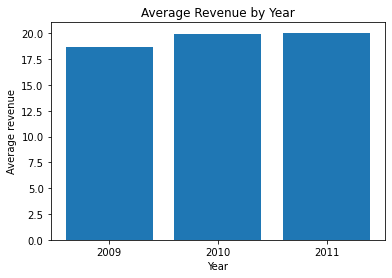

In [46]:

year = [2009, 2010, 2011]
avgRevenue = [avg2009, avg2010, avg2011]

plt.bar(year, avgRevenue)

plt.title('Average Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Average revenue')
plt.xticks(year) #ini digunakan untuk menampilkan hanya tahun 2009, 2010, 2011
plt.show

#### tambahan, sebenarnya kurang penting

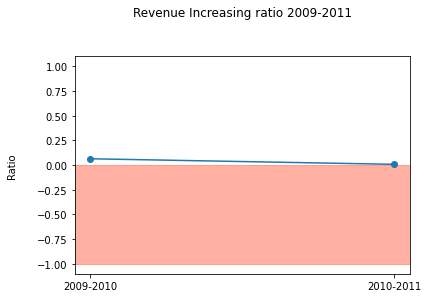

In [54]:

# Create a figure and axis object
fig, ax = plt.subplots()

# Calculate the average revenue increasing ratios from 2009 to 2010 and from 2010 to 2011
avg2009 = df[df['Year'] == 2009]['Revenue'].mean()
avg2010 = df[df['Year'] == 2010]['Revenue'].mean()
avg2011 = df[df['Year'] == 2011]['Revenue'].mean()
ratio0910 = (avg2010 - avg2009) / avg2009
ratio1011 = (avg2011 - avg2010) / avg2010

# Create a line chart showing the average revenue increasing ratios
years = ['2009-2010', '2010-2011']
ratios = [ratio0910, ratio1011]
plt.plot(years, ratios, marker='o')

# Add a background color to the y-labels below 0
ax.axhspan(ymin=0, ymax=1, xmin=0, xmax=1, alpha=0.5, color='white')
ax.axhspan(ymin=-1, ymax=0, xmin=0, xmax=1, alpha=0.5, color='tomato')

# Set the y-label and add some padding
ax.set_ylabel('Ratio')
ax.yaxis.labelpad = 20
plt.title('Revenue Increasing ratio 2009-2011',pad=40)

# Show the plot
plt.show()

## Section 2

### Filtering Data 

#### Customers who finished their purchases

#### Customers who canceled their purchases

### Number of Finished and Canceled Transactions Each Year

### Cancellation Rate

### Interpretation